In [ ]:
import cv2
from patchify import patchify, unpatchify
from PIL import Image
import matplotlib.pyplot as plt
import torch
import numpy as np
import torchvision

In [ ]:
import cv2
from patchify import patchify, unpatchify
from model import * 
from torchvision import transforms


model_name = 'Segmentation_v3.pth.tar'
model = torch.load(model_name)['model'].to('cpu')

def inference_seg(image_path, size, shape, step, model):
    img = cv2.resize(cv2.imread(image_path), size)/255.     # Maybe we need to apply Transformation.
    
    patches_img = patchify(img, shape, step=step)
    image_batch = patches_img.reshape((-1, size[1], size[1], 3))
    x = torch.from_numpy(image_batch).permute(0, -1, 1, 2)
    x = x.to(torch.float32).to('cpu')
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    x = normalize(x)
    print(x.shape)
    pred = model(x)
    
    mask = torch.argmax(torch.nn.Softmax(dim=1)(pred), dim=1).reshape(patches_img.shape[:-1])
    print(mask.shape)
    mask = unpatchify(mask.unsqueeze(-1).numpy(), (img.shape[0], img.shape[1],1))
    return img, mask


image_path = "D:/Major_Project_Initial/left/leftImg8bit/train/monchengladbach/monchengladbach_000000_010280_leftImg8bit.png"
mask_path = "D:/Major_Project_Initial/segmentation/gtFine/train/monchengladbach/monchengladbach_000000_010280_gtFine_labelIds.png"
size = (512, 256)
patch_size = 256

image, mask = inference_seg(image_path, size, (patch_size, patch_size, 3), patch_size, model)
truth = plt.imread(mask_path)

figure, axis = plt.subplots(1, 3, figsize=(70,20))
axis[0].imshow(image)
axis[1].imshow(mask)
axis[2].imshow(truth)

In [ ]:
import cv2
from patchify import patchify, unpatchify
from model import * 

model_name = 'Segmentation_v2_1.pth.tar'
model = torch.load(model_name)['model'].to('cpu')

def inference_seg(image_path, size, shape, step, model):
    img = cv2.resize(cv2.imread(image_path), size)/255.     # Maybe we need to apply Transformation.
    
    patches_img = patchify(img, shape, step=step)
    
    image_batch = patches_img.reshape((-1, 128, 256, 3))
    x = torch.from_numpy(image_batch).permute(0, -1, 1, 2)
    x = x.to(torch.float32).to('cpu')
    pred = model(x)
    
    mask = torch.argmax(torch.nn.Softmax(dim=1)(pred), dim=1).reshape(patches_img.shape[:-1])
    mask = unpatchify(mask.unsqueeze(-1).numpy(), (img.shape[0], img.shape[1],1))
    return img, mask


image_path = "D:/Major_Project_Initial/left/leftImg8bit/train/strasbourg/strasbourg_000000_033129_leftImg8bit.png"
size = (512, 256)
patch_size = 256

image, mask = inference_seg(image_path, size, (patch_size/2, patch_size, 3), patch_size//2, model)


figure, axis = plt.subplots(1, 2, figsize=(70,200))
axis[0].imshow(image)
axis[1].imshow(mask)

In [ ]:
image_path = "D:/Major_Project_Initial/left/leftImg8bit/train/stuttgart/stuttgart_000029_000019_leftImg8bit.png"

In [ ]:
size = (512, 256)

img = cv2.resize(cv2.imread(image_path), size)/255.

# img = Image.open(image_path).convert("RGB").resize(size)
img.shape

In [ ]:
plt.imshow(img)

In [ ]:
patch_size = 256
patches_img = patchify(img, (patch_size, patch_size, 3), step=patch_size)

In [ ]:
shape = patches_img.shape
shape

In [ ]:
patches_img = patches_img[:,:,0,:,:,:]

In [ ]:
temp = patches_img.reshape((-1, 128, 256, 3))

In [ ]:
plt.imshow(patches_img[0][0])

In [ ]:
temp.shape

In [ ]:
plt.imshow(temp[0])

In [ ]:
x = torch.from_numpy(temp).permute(0, -1, 1, 2)

In [ ]:
x.shape

In [ ]:
plt.imshow(x[0].permute(1, 2, 0))

In [ ]:
from model import *

In [ ]:
model_name = 'Segmentation_v2.pth.tar'
model = torch.load(model_name)['model'].to('cpu')

In [ ]:
x = x.to(torch.float32).to('cpu')
pred = model(x)

In [ ]:
pred.shape

In [ ]:
patches_img.shape

In [ ]:
image = unpatchify(np.expand_dims(patches_img, 2), img.shape)

In [ ]:
figure, axis = plt.subplots(1, 2, figsize=(70,200))

mask = torch.argmax(torch.nn.Softmax(dim=1)(pred), dim=1).reshape(shape[:-1])
mask = unpatchify(mask.unsqueeze(-1).numpy(), (img.shape[0], img.shape[1],1))
axis[0].imshow(image)
axis[1].imshow(mask)

In [ ]:
mask = "D:/Major_Project_Initial/segmentation/gtFine/train/jena/jena_000051_000019_gtFine_labelIds.png"

In [ ]:
mask = plt.imread(mask)

In [ ]:
plt.imshow(mask)

In [ ]:
#------------------------END---------------------

In [ ]:
from dataset import *
from utils import *

In [ ]:
train_file = "train.json"
train_dataset = CityScape(train_file, (512, 256), transform)
train_gen = DataLoader(
    dataset=train_dataset,
    batch_size=1,
    num_workers=4,
    shuffle=True,
    pin_memory=True,
    collate_fn=train_dataset.collate_fn
)
for i, (image, mask) in enumerate(train_gen):
    print(image.shape, mask.shape)
    break

In [ ]:
plt.imshow(image[0].permute(1, 2, 0))

In [ ]:
plt.imshow(image[1].permute(1, 2, 0))

In [ ]:
image[0]/255.

In [ ]:
m = torch.argmax(mask, dim=1)

In [ ]:
plt.imshow(m[0])

In [ ]:
plt.imshow(m[1])

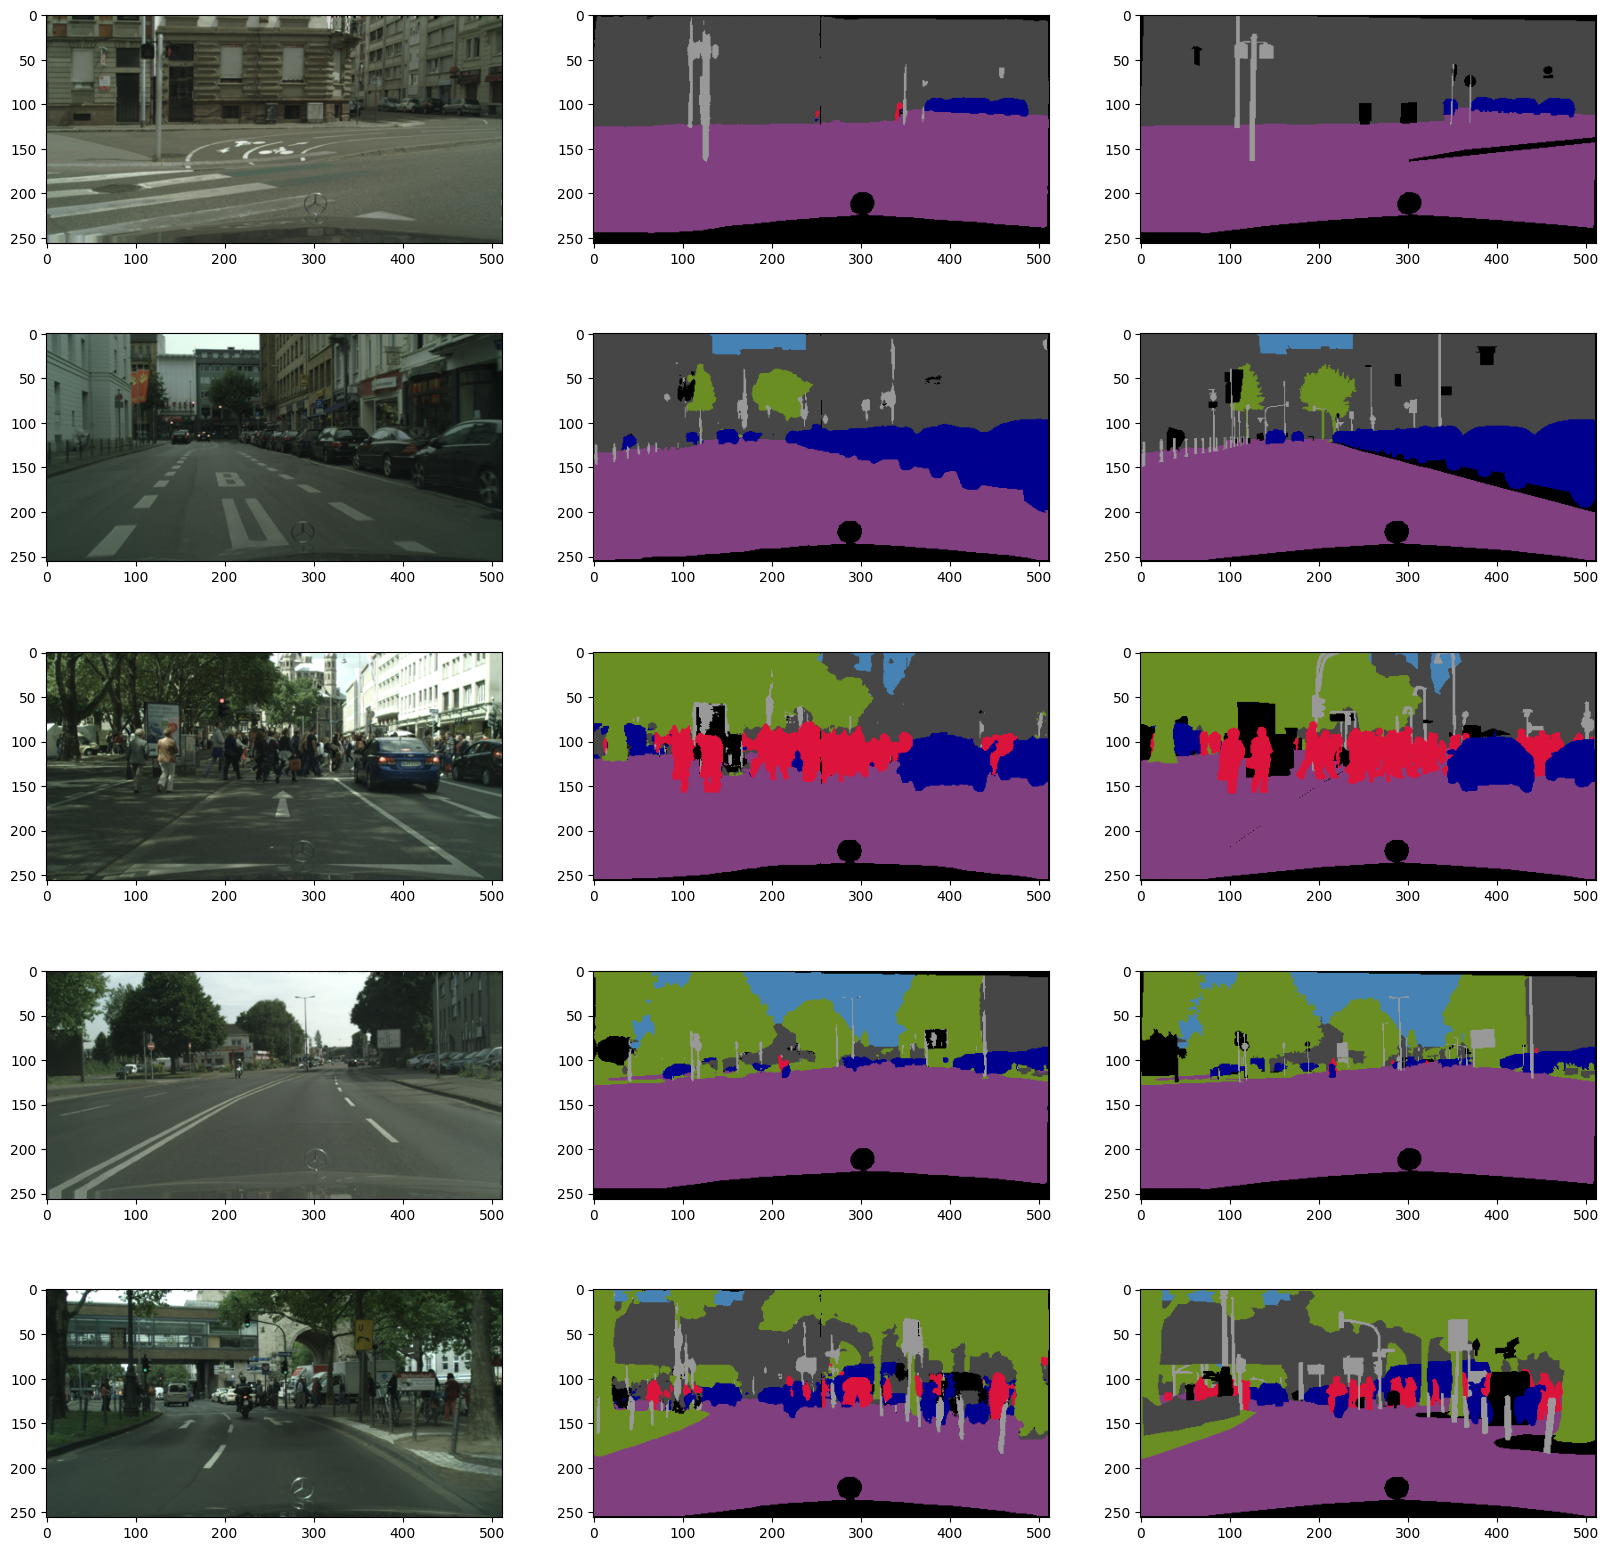

In [1]:
import cv2
from patchify import patchify, unpatchify
from model_v2 import * 
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch
import random
import json

id_to_cat = {
                    0: 0,
                    1: 0,
                    2: 0,
                    3: 0,
                    4: 0,
                    5: 0,
                    6: 0,
                    7: 1,
                    8: 1,
                    9: 1,
                    10: 1,
                    11: 2,
                    12: 2,
                    13: 2,
                    14: 2,
                    15: 2,
                    16: 2,
                    17: 3,
                    18: 3,
                    19: 3,
                    20: 3,
                    21: 4,
                    22: 4,
                    23: 5,
                    24: 6,
                    25: 6,
                    26: 7,
                    27: 7,
                    28: 7,
                    29: 7,
                    30: 7,
                    31: 7,
                    32: 7,
                    33: 7,
                    -1: 7
                }

model_name = 'Segmentation_v14.pth.tar'
model = torch.load(model_name)['model'].to('cpu')

def inference_seg(image_path, size, shape, step, model):
    img = np.array(Image.open(image_path).convert("RGB").resize(size))/255.     # Maybe we need to apply Transformation.
    
    patches_img = patchify(img, shape, step=step)
    image_batch = patches_img.reshape((-1, size[1], size[1], 3))
    x = torch.from_numpy(image_batch).permute(0, -1, 1, 2)
    x = x.to(torch.float32).to('cpu')
#     x = normalize(x)
#     print(x.shape)
    pred = model(x)
#     print(pred.shape)
    mask = torch.argmax(torch.nn.Softmax(dim=1)(pred), dim=1).reshape(patches_img.shape[:-1])
    mask = unpatchify(mask.unsqueeze(-1).numpy(), (img.shape[0], img.shape[1],1))
    return img, mask

# image_path, mask_path = ["D:/Major_Project_Initial/left/leftImg8bit/train/monchengladbach/monchengladbach_000000_002478_leftImg8bit.png", "D:/Major_Project_Initial/segmentation/gtFine/train/monchengladbach/monchengladbach_000000_002478_gtFine_labelIds.png"]
# image_path = "D:/Major_Project_Initial/left/leftImg8bit/train/monchengladbach/monchengladbach_000000_010280_leftImg8bit.png"
# mask_path = "D:/Major_Project_Initial/segmentation/gtFine/train/monchengladbach/monchengladbach_000000_010280_gtFine_labelIds.png"
size = (512, 256)
patch_size = 256


file_name = 'train.json'
f = open(file_name)
k = 5
data = random.choices(json.load(f), k = k)
figure, axis = plt.subplots(k, 3, figsize=(20,20))

classColor = {0: "black", 1:"brown", 2: "green", 3: "blue", 4: "gray", 5: "x", 6: "y", 7: "z"}
color = {'black': [0,0,0], "brown": [128, 64,128], 'green': [ 70, 70, 70], 'blue': [153,153,153], "gray": [107,142, 35], "x" : [ 70,130,180], "y": [220, 20, 60], "z": [0,  0,142]}


for i, (image_path, mask_path) in enumerate(data):
    image, mask = inference_seg(image_path, size, (patch_size, patch_size, 3), patch_size, model)
    truth = torch.tensor(np.array(Image.open(mask_path).convert('L').resize(size, Image.Resampling.NEAREST)))
    truth = truth.apply_(id_to_cat.get)
    m = truth.numpy()
    p = mask.reshape(256, -1)
#     print(np.unique(mask))
#     print(np.unique(truth))
    
    temp1 = np.zeros(shape=(256, 512, 3))    
    temp2 = np.zeros(shape=(256, 512, 3))
    for x in range(256):
        for y in range(512):
            temp1[x][y] = np.array(color[classColor[m[x][y]]])
            temp2[x][y] = np.array(color[classColor[p[x][y]]])
    temp1 = temp1/255.
    temp2 = temp2/255.

    axis[i][0].imshow(image)
    axis[i][1].imshow(temp2)
    axis[i][2].imshow(temp1)

In [2]:
from dataset import CityScape
import torchmetrics
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
from utils import transform
import warnings
warnings.filterwarnings('ignore')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
model = model.to(device)
train_file = "train.json"
test_file = "val.json"

size = (512, 256) # (256, 512)


train_dataset = CityScape(train_file, size, transform)
test_dataset = CityScape(test_file, size, transform)

num_classes = 8
batch_size = 2
workers = 4

train_gen = DataLoader(
        dataset=train_dataset,
        batch_size=batch_size,
        num_workers=workers,
        pin_memory=True,
        collate_fn=train_dataset.collate_fn

    )


test_gen = DataLoader(
        dataset=test_dataset,
        batch_size=batch_size,
        num_workers=workers,
        pin_memory=True,
        collate_fn=train_dataset.collate_fn

    )

C:\Users\Jaitej\anaconda3\envs\gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
metric = torchmetrics.ConfusionMatrix(task = "multiclass", num_classes=8).to(device)
f1 = torchmetrics.F1Score(task="multiclass", num_classes=8, average='weighted').to(device)

def accuracy(pred, label):    
    corrects = (pred == label).float()
    acc = corrects.sum() / corrects.numel()
    return acc

def show_matrix(confusion_matrix):
    fig, ax = plt.subplots(figsize=(10, 10))

    xlabs = ["Void", "flat", "construction", "Object", "nature", "Sky", "Human", "Vehicle"] # Need to change this.
    ax.imshow(confusion_matrix.cpu())

    ax.set_xticks(torch.arange(len(xlabs)), labels = xlabs)
    ax.set_yticks(torch.arange(len(xlabs)), labels = xlabs)

    for i in range(8):
        for j in range(8):
            ax.text(i, j, confusion_matrix[i][j].item(), ha='center', va='center', color="olive")

            
def eval(data_gen, name="train"):
    average_accuracy = 0
    confusion_matrix = torch.zeros(8,8).to(device)
    f1score = 0
    torch.no_grad()
    for i, (image, mask) in enumerate(data_gen):
        image = image.to(device)
        mask = mask.to(device)
        pred_mask = model(image)

        mask = torch.argmax(mask, dim=1).float()
        pred_mask = torch.argmax(torch.nn.Softmax(dim=1)(pred_mask), dim=1).float()
        
        confusion_matrix = confusion_matrix + metric(pred_mask, mask)
        average_accuracy = average_accuracy + accuracy(pred_mask, mask)

        f1score = f1score + f1(pred_mask, mask)
        
        if i%100 == 0:
            print("=", end="")

        del image, mask, pred_mask

    print(f"\n{name} Accuracy: {average_accuracy/(i + 1)}")
    print(f"\n{name} F1 Score: {f1score/(i + 1)}")    
    print(f"\n{name} Confusion Matrix: ")
    show_matrix(confusion_matrix)

train Accuracy: 0.9374362826347351

train Accuracy: 0.0

train F1 Score: 0.9354496598243713

train Confusion Matrix: 


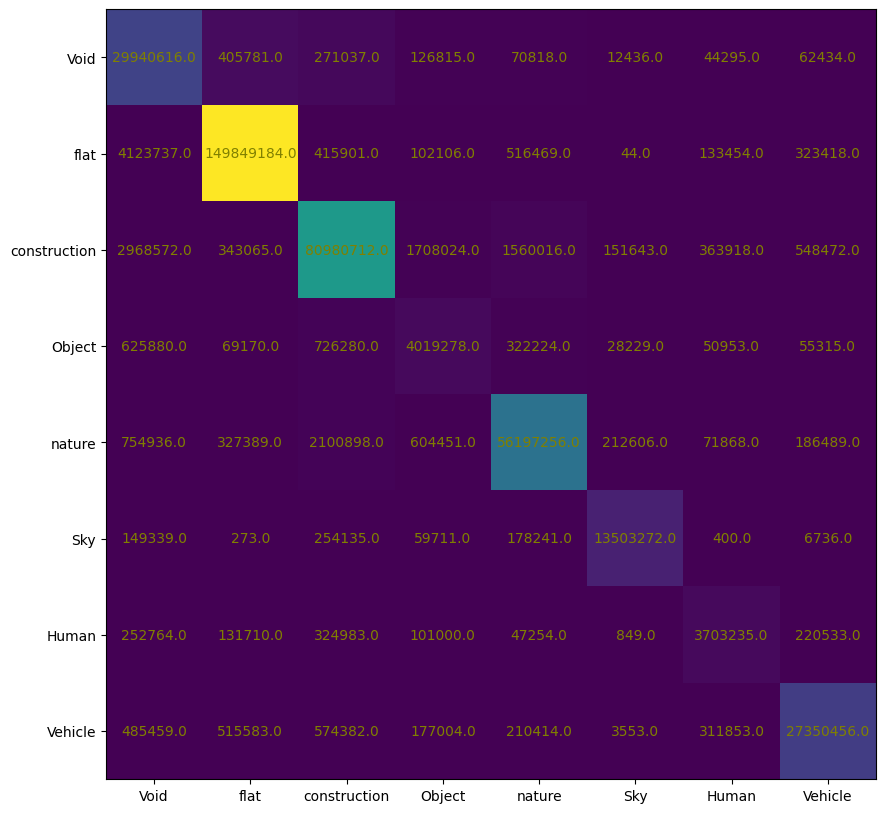

In [4]:
eval(data_gen=train_gen, name="train")

===
test Accuracy: 0.9115049242973328

test Accuracy: 0.0

test F1 Score: 0.909043550491333

test Confusion Matrix: 


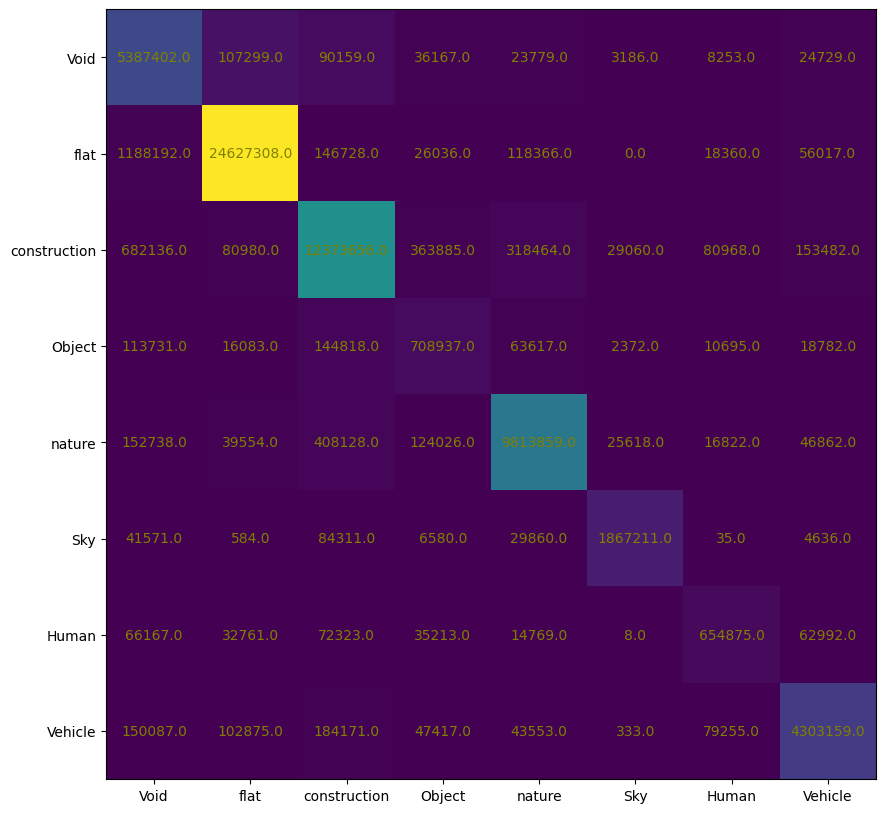

In [5]:
eval(data_gen=test_gen, name="test")